In [1]:
import pkp
import cpd
%matplotlib inline
plt.style.use(['mystyle-vega'])

/Users/vascella/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
print('PKP version: {}'.format(pkp.__version__))
print('CPD version: {}'.format(cpd.__version__))

PKP version: 2.1.0+2.g6e73e1b.dirty
CPD version: 0.0.1+5.g85d328c.dirty


In [3]:
ua = {'C': 74.12, 'H': 4.96, 'O': 13.18, 'N': 1.45, 'S': 0}
pa = {'FC': 57, 'VM': 43, 'Ash': 0, 'Moist': 0}
p = 101325
coal = cpd.CPD(ultimate_analysis=ua, proximate_analysis=pa, pressure=p, 
               name='test')
operating_conditions = [[0, 600], [0.01, 1200], [0.02, 1200]]
coal.operating_conditions = operating_conditions

In [4]:
coal.set_parameters(dt=1e-6, dt_max=1e-4)
%time res = coal.run()

/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


CPU times: user 259 ms, sys: 8.44 ms, total: 267 ms
Wall time: 268 ms


In [5]:
coal0 = pkp.CPD(ultimate_analysis=ua, proximate_analysis=pa, pressure=p, 
               name='test')
coal0.operating_conditions = operating_conditions

In [6]:
coal0.set_parameters(dt=1e-6, dt_max=1e-4)
%time res0 = coal0.run()

CPU times: user 27.2 ms, sys: 10.7 ms, total: 38 ms
Wall time: 55.2 ms


In [7]:
%prun res = coal.run()

/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


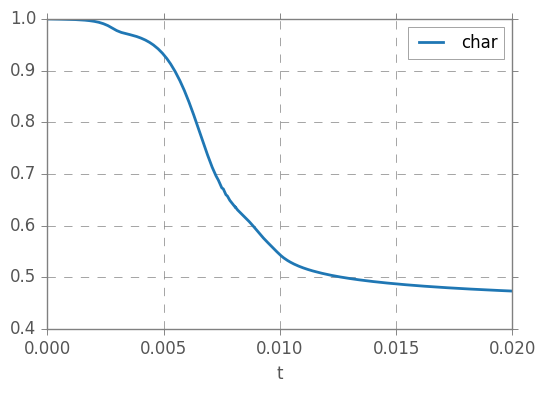

In [8]:
res.plot(x='t', y='char')

In [9]:
cpd.binomial

<function cpd.binomial.bpmfln>

In [10]:
n = 50
%timeit cpd.binomial(np.arange(n), n, 0.1)

The slowest run took 4.38 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 48.1 µs per loop


In [11]:
from scipy.stats import binom

In [12]:
%timeit binom.pmf(np.arange(n), n, 0.1)

The slowest run took 4.85 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 185 µs per loop


In [13]:
%time res = coal.run()

/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


CPU times: user 296 ms, sys: 9.25 ms, total: 305 ms
Wall time: 302 ms


In [14]:
cpd.binomial = binom.pmf
%time res = coal.run()

/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


CPU times: user 296 ms, sys: 10.5 ms, total: 306 ms
Wall time: 307 ms
